In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
# Any results you write to the current directory are saved as output.

['data-scientist-job-market-in-the-us']


In [2]:
#read the data from a csv file
base_data_df = pd.read_csv("../input/data-scientist-job-market-in-the-us/alldata.csv")

In [3]:
#Finding out the null rows if any 
base_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        5326 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


In [4]:
#finding out the data distribution 
base_data_df.describe(include='all')

,position,company,description,reviews,location
count,6953,6953,6953,5326.000000,6953
unique,5242,2213,6708,NaN,382
top,Data Scientist,Amazon.com,Note: By applying to this position your applic...,NaN,"Seattle, WA"
freq,351,358,9,NaN,563
mean,NaN,NaN,NaN,3179.089185,NaN
std,NaN,NaN,NaN,8448.515056,NaN
min,NaN,NaN,NaN,2.000000,NaN
25%,NaN,NaN,NaN,27.000000,NaN
50%,NaN,NaN,NaN,230.000000,NaN
75%,NaN,NaN,NaN,1578.000000,NaN


In [5]:
#top 20 rows
base_data_df.head(20)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


1. How the jobs are distributed geographically?
2. Which types of positions are in demand geographically?
3. Company vs position vs geography
4. Reviews: Position preference, Interest shown by people for a particular position


Given a role, i would like to find the locations in US where such requirement is in demand?

In [6]:
#pandas profiling
pandas_profiling.ProfileReport(base_data_df)

Number of variables,5
Number of observations,6964
Total Missing (%),4.8%
Total size in memory,272.1 KiB
Average record size in memory,40.0 B
Numeric,1
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
#finding the duplicated rows
base_data_df[base_data_df.duplicated()]

,position,company,description,reviews,location
331,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN
5014,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN
5103,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN
6093,NaN,NaN,NaN,NaN,NaN
6168,NaN,NaN,NaN,NaN,NaN


In [8]:
#Make a copy of the base dataset
ds_df = base_data_df.copy()

In [9]:
#drop all na rows
ds_df.dropna(inplace=True)

In [10]:
#replace all na with 0 for reviews
ds_df['reviews'].fillna(0, inplace=True)

Text(0.5, 0, 'Company Name')

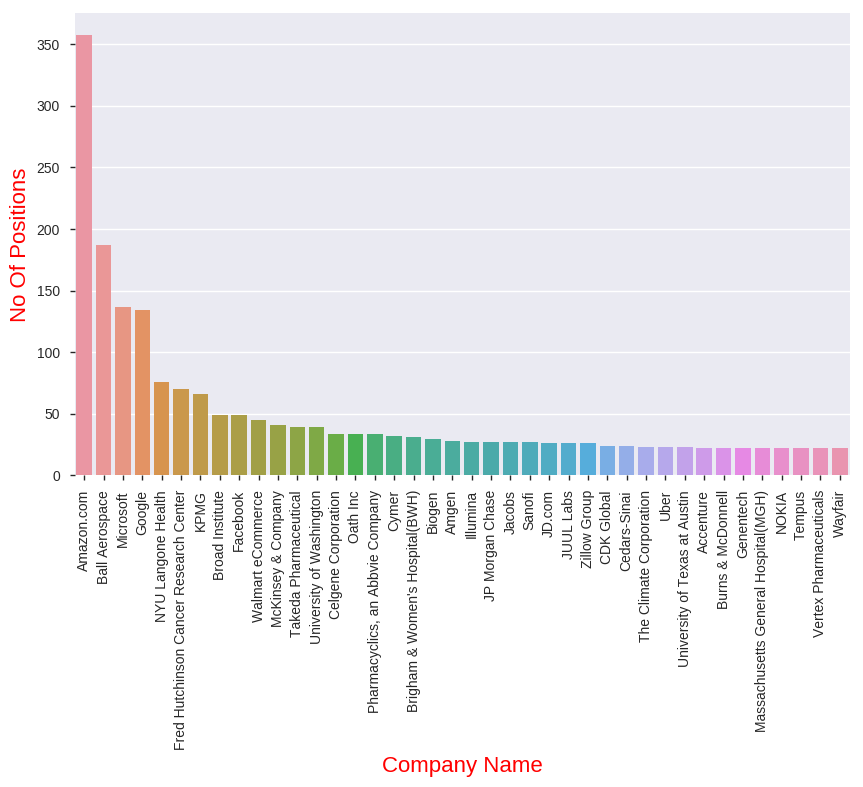

In [11]:
#finding the top 40 companies by open positions
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=ds_df.groupby('company').count().nlargest(40, 'position').reset_index(), x ='company', y='position')
a.set_xticklabels(ds_df.groupby('company').count().nlargest(40, 'position').reset_index()['company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red') 

Text(0.5, 0, 'Designation')

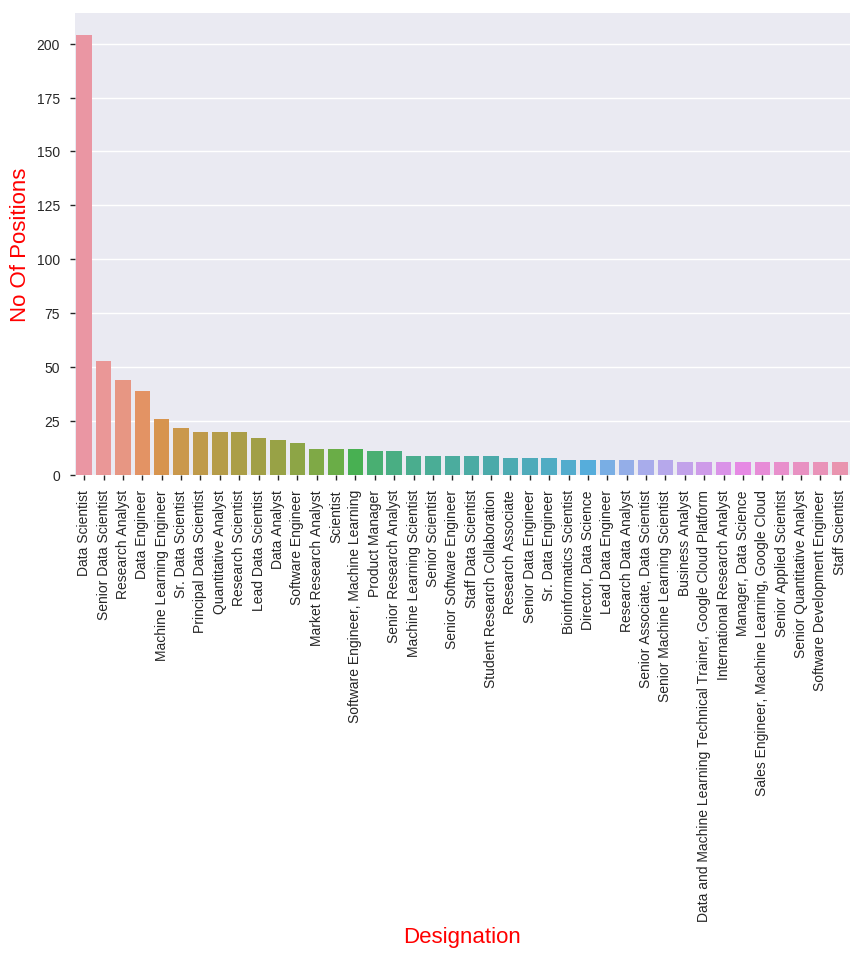

In [12]:
#finding the top 40 designations which are in high demand 
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=ds_df.groupby('position').count().nlargest(40, 'company').reset_index(), x ='position', y='company')
a.set_xticklabels(ds_df.groupby('position').count().nlargest(40, 'company').reset_index()['position'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Designation',fontsize=16,color='red') 

In [13]:
## Grouping the designations into the following roles
## Data Scientist, Lead Data Scientist, Data Engineer, Data Analyst, Director

## Filtered all the directors from the table
ds_df.loc[ds_df['position'].str.contains('Director', case=False) & ds_df['position'].str.contains('data', case=False), 'designation'] = 'Director'

## Filtered all the Data Scientists from the table
ds_df.loc[ds_df['position'] == 'Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Senior Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Sr. Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Principal Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Lead Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Staff Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Junior Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Machine Learning Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Principal Research Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Research Analyst', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Machine Learning Engineer', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Quantitative Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Research Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Market Research Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Senior Research Analyst', 'designation'] = 'Data Analyst'
## Check scientist, Senior Scientist, Senior Applied Scientist Staff Scientist,Applied Scientist, Associate Scientist role description
ds_df.loc[ds_df['position'] == 'Software Engineer, Machine Learning', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Senior Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Sr. Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Lead Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Research Data Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Senior Associate, Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Senior Machine Learning Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Business Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Data and Machine Learning Technical Trainer, Google Cloud Platform', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'International Research Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Manager, Data Science', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Sales Engineer, Machine Learning, Google Cloud', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Analysis Manager', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Data Science Manager', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Scientist, Analytics', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Machine Learning Data Scientist', 'designation'] = 'Data Scientist'

In [14]:
#drop all the designations that are not related to Data Science
ds_df['designation'].dropna(inplace=True)
#drop all null rows
ds_df.dropna(inplace=True)

Text(0.5, 0, 'Designation')

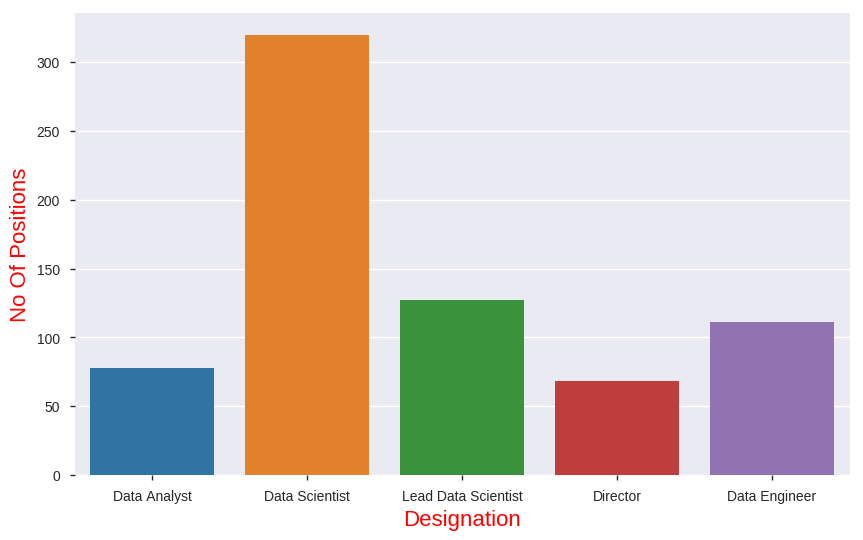

In [15]:
# Finding the number of positions for the assigned designations
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.countplot(data=ds_df, x ='designation')
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Designation',fontsize=16,color='red') 
## the same plot can be done using 
## ds_df['designation'].value_counts().plot.bar()

In [16]:
ds_df['location'].value_counts().head(30)
# We can observe that different location with similar names are having different vaulues.
#for example New York, NY and New York, NY 10003 both are pointing to the same location hence we need to rename
#all such locations in a standard format

New York, NY               113
San Francisco, CA           73
Chicago, IL                 41
Boston, MA                  34
Seattle, WA                 28
Washington, DC              24
Los Angeles, CA             20
Atlanta, GA                 17
San Diego, CA               15
Mountain View, CA           14
Cambridge, MA               13
Sunnyvale, CA               11
Austin, TX                   8
Seattle, WA 98104            6
Washington, DC 20036         6
Redmond, WA 98052            6
San Francisco, CA 94105      5
New York, NY 10016           5
San Mateo, CA                5
Atlanta, GA 30338            5
New York, NY 10041           5
Boston, MA 02110             5
Boulder, CO                  5
Manhattan, NY                5
Redwood City, CA             5
San Francisco, CA 94104      5
San Francisco, CA 94103      5
Chicago, IL 60601            5
Mountain View, CA 94041      4
San Francisco, CA 94107      4
Name: location, dtype: int64

In [17]:
# Renaming all the locations to the standard format
ds_df.loc[ds_df['location'].str.contains('New York', case=False), 'location'] = 'New York'
ds_df.loc[ds_df['location'].str.contains('San Francisco', case=False), 'location'] = 'San Francisco'
ds_df.loc[ds_df['location'].str.contains('San Diego', case=False), 'location'] = 'San Diego'
ds_df.loc[ds_df['location'].str.contains('Atlanta', case=False), 'location'] = 'Atlanta'
ds_df.loc[ds_df['location'].str.contains('Chicago', case=False), 'location'] = 'Chicago'
ds_df.loc[ds_df['location'].str.contains('Seattle', case=False), 'location'] = 'Seattle'
ds_df.loc[ds_df['location'].str.contains('Boston', case=False), 'location'] = 'Boston'
ds_df.loc[ds_df['location'].str.contains('Washington', case=False), 'location'] = 'Washington'
ds_df.loc[ds_df['location'].str.contains('Los Angeles', case=False), 'location'] = 'Los Angeles'
ds_df.loc[ds_df['location'].str.contains('Mountain View', case=False), 'location'] = 'Mountain View'
ds_df.loc[ds_df['location'].str.contains('Cambridge', case=False), 'location'] = 'Cambridge'
ds_df.loc[ds_df['location'].str.contains('Sunnyvale', case=False), 'location'] = 'California'
ds_df.loc[ds_df['location'].str.contains('CA', case=True), 'location'] = 'California'
ds_df.loc[ds_df['location'].str.contains('NJ', case=True), 'location'] = 'New Jersey'
ds_df.loc[ds_df['location'].str.contains('NY', case=True), 'location'] = 'New York'
ds_df.loc[ds_df['location'].str.contains('TX', case=True), 'location'] = 'Texas'
ds_df.loc[ds_df['location'].str.contains('WA', case=True), 'location'] = 'Washington'



3. Company vs position vs geography
4. Reviews: Position preference, Interest shown by people for a particular position


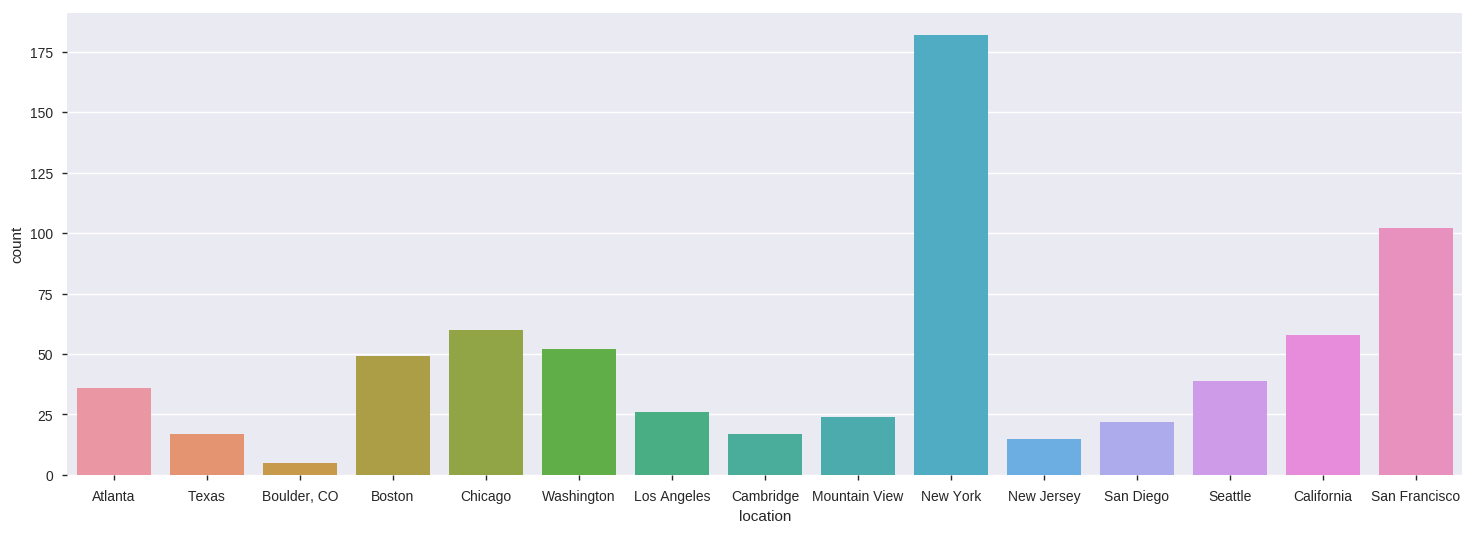

In [18]:
# How the jobs are distributed geographically?
from matplotlib.pyplot import figure, show
width=18
height=6
figure(figsize=(width,height))
sns.countplot(data=ds_df, x='location')
# same can be done using: sns.barplot(data=ds_df.groupby(['location'])['position'].count().reset_index(), x='location', y='position')
show()

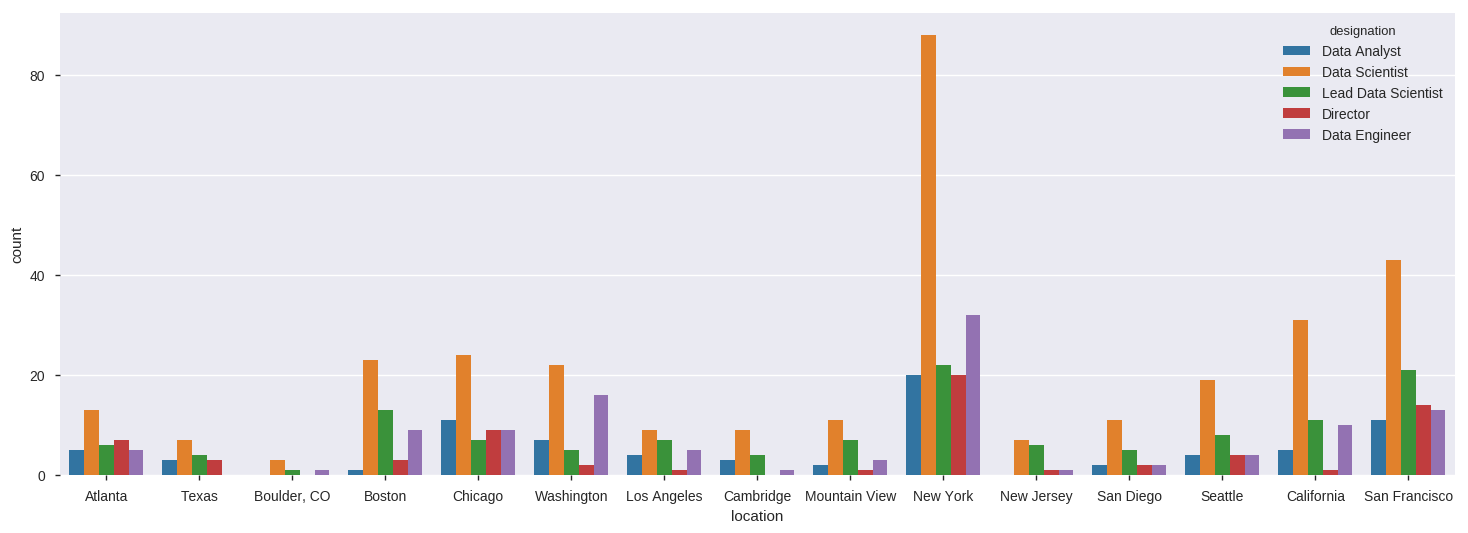

In [19]:
# Based on the previous graph we have only figured out total open positions at every location
# It would be more intuitive if we know different designated open positions at each location, let us plot that.
# It can be achieved by adding hue to the above countplot
from matplotlib.pyplot import figure, show
width=18
height=6
figure(figsize=(width,height))
sns.countplot(data=ds_df, x='location',hue='designation')
show()

In [20]:
top_20_company_list = ds_df.groupby(['company'])['location'].count().reset_index().sort_values('location',ascending=False).head(20)['company'].tolist()
top_20_company_list

['Amazon.com',
 'KPMG',
 'Google',
 'JLL',
 'Microsoft',
 'Twitter',
 'DigitasLBi',
 'Oath Inc',
 'Nielsen',
 'Mathematica Policy Research',
 'Smith Hanley Associates',
 'Capital One',
 'JD.com',
 'Jobspring Partners',
 'ThoughtWorks',
 'Two Sigma Investments, LLC.',
 'Workbridge Associates',
 'Facebook',
 'NORC at the University of Chicago',
 'Gallup']

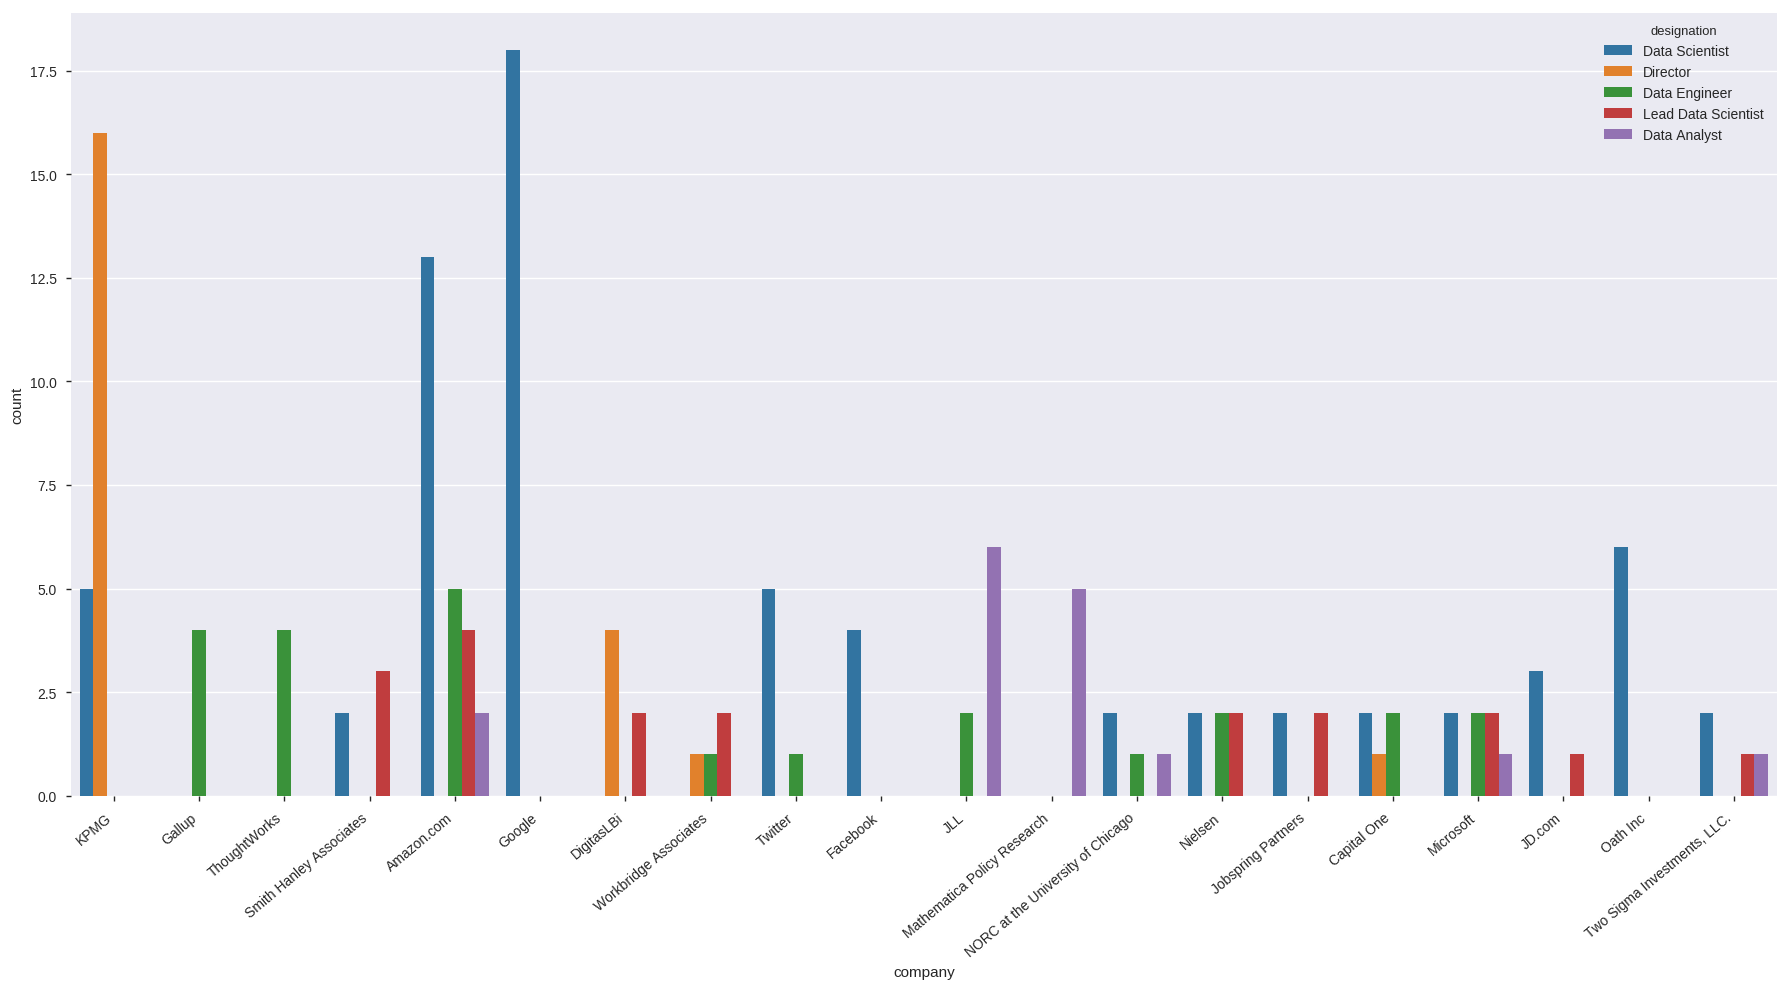

In [21]:
# Based on the previous graph we have only figured out total open positions at every location
# It would be more intuitive if we know different designated open positions at each location, let us plot that.
# It can be achieved by adding hue to the above countplot
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(18,10))   
ax = sns.countplot(data=ds_df[ds_df['company'].isin(top_20_company_list)], x='company',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

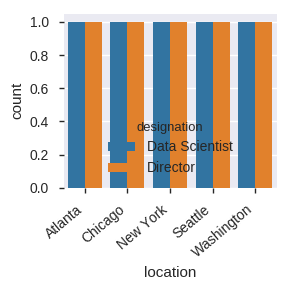

In [22]:
df_final =  pd.DataFrame(ds_df.groupby(['company','location','designation'])['position'].count().reset_index())


from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(3,3))   
ax = sns.countplot(data=df_final[df_final['company'] == 'KPMG'], x='location',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

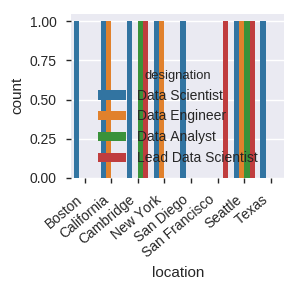

In [23]:
fig,a=plt.subplots(figsize=(3,3))  
ax = sns.countplot(data=df_final[df_final['company'] == 'Amazon.com'], x='location',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

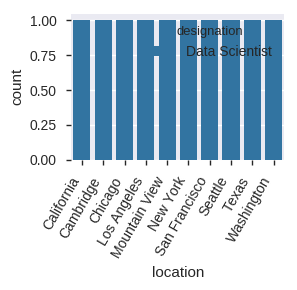

In [24]:
fig,a=plt.subplots(figsize=(3,3))  
ax = sns.countplot(data=df_final[df_final['company'] == 'Google'], x='location',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

**Conclusion**: We see that Data scientist role is in high demand irrespective of any location. Company wise we see that Amazon has a huge number of open positions for various data science roles. Location wise we see that New York has a maximum number of open positions for data science roles compared to any other locations.